## Data Cleaning with Python and Pandas: Detecting Missing Values

The features are as follows:
  * ST_NUM: Street number

  * ST_NAME: Street name

  * OWN_OCCUPIED: Is the residence owner occupied

  * NUM_BEDROOMS: Number of bedrooms

 #### Importing libraries


In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

#### Load the data set

In [3]:
orgData = pd.read_csv("data/property_data.csv")

In [4]:
print('shape=',orgData.shape)
print('is null : ',orgData.isnull().values.any())
orgData

shape= (9, 7)
is null :  True


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800



#### Detection and visualizing Standard missing value
In reading a csv file by default the following values are interpreted as
    NaN: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan',
    'null'
    
pandas.isnull() recognize all these standard null value.

for example in Num_BEDROOMS column pandas recognized the “NAN” or n/a as a missing value but not "na" value and "--".

In [5]:
orgData.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [6]:
print(orgData['NUM_BEDROOMS'].isnull().value_counts())

pd.concat([orgData['NUM_BEDROOMS'],orgData['NUM_BEDROOMS'].isnull()],axis=1)

False    7
True     2
Name: NUM_BEDROOMS, dtype: int64


,NUM_BEDROOMS,NUM_BEDROOMS
0,3,False
1,3,False
2,NaN,True
3,1,False
4,3,False
5,NaN,True
6,2,False
7,--,False
8,na,False


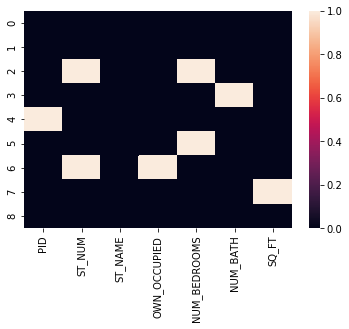

In [7]:
#Just like before, Pandas recognized the “NA” as a missing value. Unfortunately, the other types weren’t recognized
sns.heatmap(orgData.isnull())

### Handling Non-Standard missing values: 

making a list of different type of missing value

Therefor pandas handle that during reading


In [8]:
# Making a list of missing value types
missing_values = [ "na", "--"]

cleanData = pd.read_csv("data/property_data.csv", na_values = missing_values)
cleanData

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


### Handling unexpected missing values:

for example: numeric value in string column, the number 12 in following column

In [9]:
pd.concat([cleanData['OWN_OCCUPIED'], cleanData['OWN_OCCUPIED'].isnull()], axis=1)

,OWN_OCCUPIED,OWN_OCCUPIED
0,Y,False
1,N,False
2,N,False
3,12,False
4,Y,False
5,Y,False
6,NaN,True
7,Y,False
8,Y,False


In [10]:
cleanData['OWN_OCCUPIED'].str.isnumeric()

0    False
1    False
2    False
3     True
4    False
5    False
6      NaN
7    False
8    False
Name: OWN_OCCUPIED, dtype: object

#### Detecting numbers with try/except method

In [13]:
cnt=0
for row in cleanData['OWN_OCCUPIED']:
    try:
        int(row)
        cleanData.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except :
        pass
    cnt+=1


In [15]:
cleanData["OWN_OCCUPIED"]

0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [16]:
cleanData.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64